In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42
pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv', delimiter='\t')

In [ ]:
removedFeatures = [f'Q{i}E' for i in range(1, 43)] # add feature 'Q1E' to 'Q42E' to be removed
removedFeatures.extend([f'Q{i}I' for i in range(1, 43)]) # add feature 'Q1E' to 'Q42E' to be removed
removedFeatures.extend([f'VCL{i}' for i in range(1, 17)]) # add feature 'VCL1' to 'VCL16' to be removed
removedFeatures.extend([ 'source', 'introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand', 'orientation',
    'voted', 'country', 'screensize', 'uniquenetworklocation','religion','major','urban'])
depression = df.drop(removedFeatures, axis=1)
depression.head()


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,gender,age,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,2,16,10,1,2
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,2,16,70,1,4
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,2,17,60,1,3
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,2,13,70,1,5
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,19,10,1,4


In [ ]:
removed_Question_featured=['Q2A','Q3A','Q5A','Q6A','Q7A','Q9A','Q10A','Q12A','Q13A','Q14A','Q15A','Q17A','Q18A','Q19A','Q20A','Q21A','Q23A','Q24A','Q25A','Q26A','Q27A','Q28A','Q30A','Q31A','Q32A','Q33A','Q35A','Q36A','Q37A','Q39A','Q41A']
depression=depression.drop(removed_Question_featured,axis=1)

In [ ]:
depression.head()

,Q1A,Q4A,Q8A,Q11A,Q16A,Q22A,Q29A,Q34A,Q38A,Q40A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,gender,age,race,married,familysize
0,4,4,4,4,4,4,4,3,2,3,4,1,5,7,7,7,7,7,5,1,1,2,2,16,10,1,2
1,4,3,4,2,3,3,3,2,2,1,2,6,5,4,7,5,4,7,7,1,5,2,2,16,70,1,4
2,3,1,3,2,4,3,2,4,4,2,4,2,5,2,2,5,6,5,5,3,2,2,2,17,60,1,3
3,2,1,2,2,2,1,3,4,1,4,2,1,1,7,4,6,4,6,1,6,1,1,2,13,70,1,5
4,2,4,4,2,3,3,2,4,3,4,3,2,5,3,6,5,5,5,6,3,3,3,2,19,10,1,4


In [ ]:
depression.columns=['Q1','Q4','Q8','Q11','Q16','Q22','Q29','Q34','Q38','Q40','Q42','TIPI1','TIPI2',	'TIPI3'	,'TIPI4',	'TIPI5'	,'TIPI6'	,'TIPI7',	'TIPI8',	'TIPI9',	'TIPI10'	,'Education',	'Gender',	'Age'	,'Race',	'Married',	'Familysize']
depression.head()

,Q1,Q4,Q8,Q11,Q16,Q22,Q29,Q34,Q38,Q40,Q42,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Education,Gender,Age,Race,Married,Familysize
0,4,4,4,4,4,4,4,3,2,3,4,1,5,7,7,7,7,7,5,1,1,2,2,16,10,1,2
1,4,3,4,2,3,3,3,2,2,1,2,6,5,4,7,5,4,7,7,1,5,2,2,16,70,1,4
2,3,1,3,2,4,3,2,4,4,2,4,2,5,2,2,5,6,5,5,3,2,2,2,17,60,1,3
3,2,1,2,2,2,1,3,4,1,4,2,1,1,7,4,6,4,6,1,6,1,1,2,13,70,1,5
4,2,4,4,2,3,3,2,4,3,4,3,2,5,3,6,5,5,5,6,3,3,3,2,19,10,1,4


In [ ]:
depression.shape

(39775, 27)

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(depression.isnull())

In [ ]:
depression.isnull().sum()


Q1            0
Q4            0
Q8            0
Q11           0
Q16           0
Q22           0
Q29           0
Q34           0
Q38           0
Q40           0
Q42           0
TIPI1         0
TIPI2         0
TIPI3         0
TIPI4         0
TIPI5         0
TIPI6         0
TIPI7         0
TIPI8         0
TIPI9         0
TIPI10        0
Education     0
Gender        0
Age           0
Race          0
Married       0
Familysize    0
dtype: int64

<Axes: xlabel='Education', ylabel='count'>

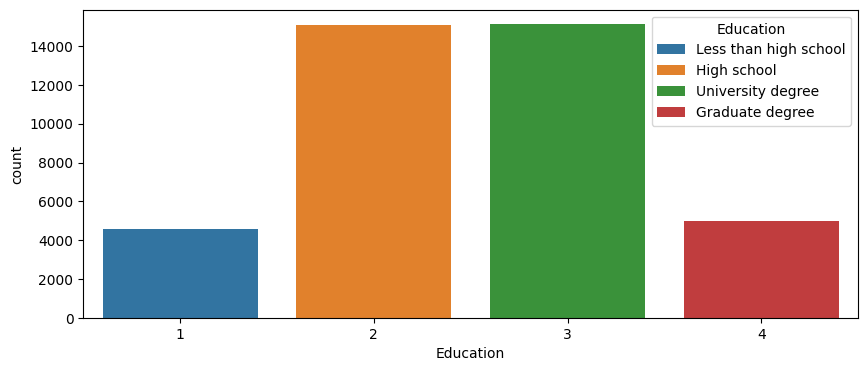

In [ ]:
depression['Education'] = depression['Education'].map({ 0: 1,  1: 1, 2: 2, 3: 3, 4: 4 })

def changeEducationTitle(title) -> str:
    if title == 0 or title == 1:
        return 'Less than high school'
    if title == 2:
        return 'High school'
    if title == 3:
        return 'University degree'
    if title == 4:
        return 'Graduate degree'
    return title


education_string = depression['Education'].apply(changeEducationTitle)


plt.figure(figsize=(10, 4))
sns.countplot(x=depression['Education'], hue=education_string)


<Axes: xlabel='Gender', ylabel='count'>

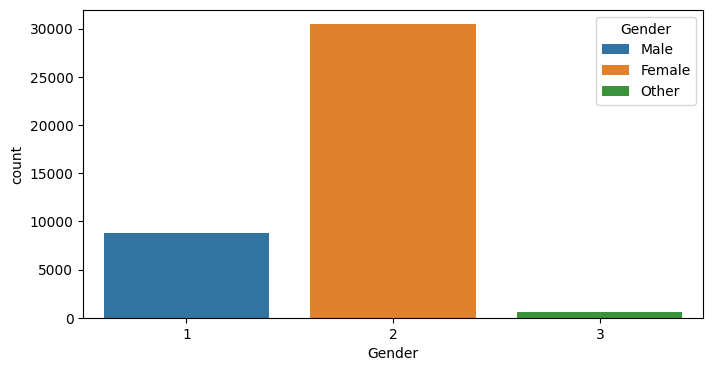

In [ ]:
depression['Gender'] = depression['Gender'].map({0: 2, 1: 1, 2: 2, 3: 3})

def changeGenderValue(value):
    if value == 1:
        return 'Male'
    if value == 2 or value == 0: # value = 0 means user didn't enter this value, we assume it's female as most records are
        return 'Female'
    return 'Other' # if 3 or 0 return other as value

gender = depression['Gender'].apply(changeGenderValue)

plt.figure(figsize=(8, 4))
sns.countplot(x = depression['Gender'], hue=gender)

In [ ]:
depression['Race'] = depression['Race'].apply(lambda x: x/10)
depression['Race'].head()

0    1.0
1    7.0
2    6.0
3    7.0
4    1.0
Name: Race, dtype: float64

1.0    23106
6.0    10659
7.0     4832
3.0      603
2.0      333
5.0      220
4.0       22
Name: Race, dtype: int64

<Axes: xlabel='Race', ylabel='count'>

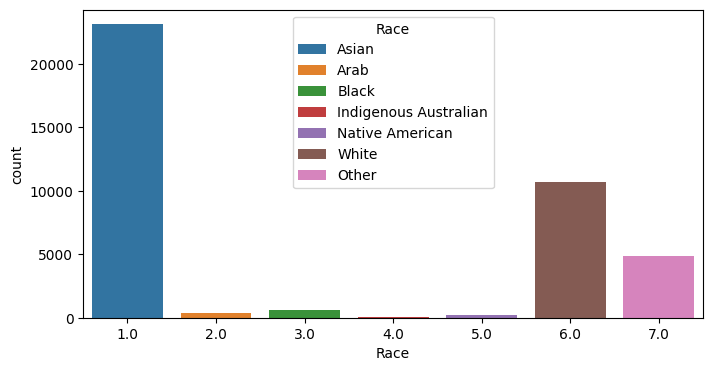

In [ ]:
def changeRaceValues(value)->str:
    if value == 1:
        return 'Asian'
    if value == 2:
        return 'Arab'
    if value == 3:
        return 'Black'
    if value == 4:
        return 'Indigenous Australian'
    if value == 5:
        return 'Native American'
    if value == 6:
        return 'White'
    if value == 7:
        return 'Other'

    return value

race = depression['Race'].apply(changeRaceValues)

display(depression['Race'].value_counts())

plt.figure(figsize=(8,4))
sns.countplot(x=depression['Race'], hue=race)

Depression size before: 39775
Depression size after: 39743


<Axes: xlabel='Familysize', ylabel='count'>

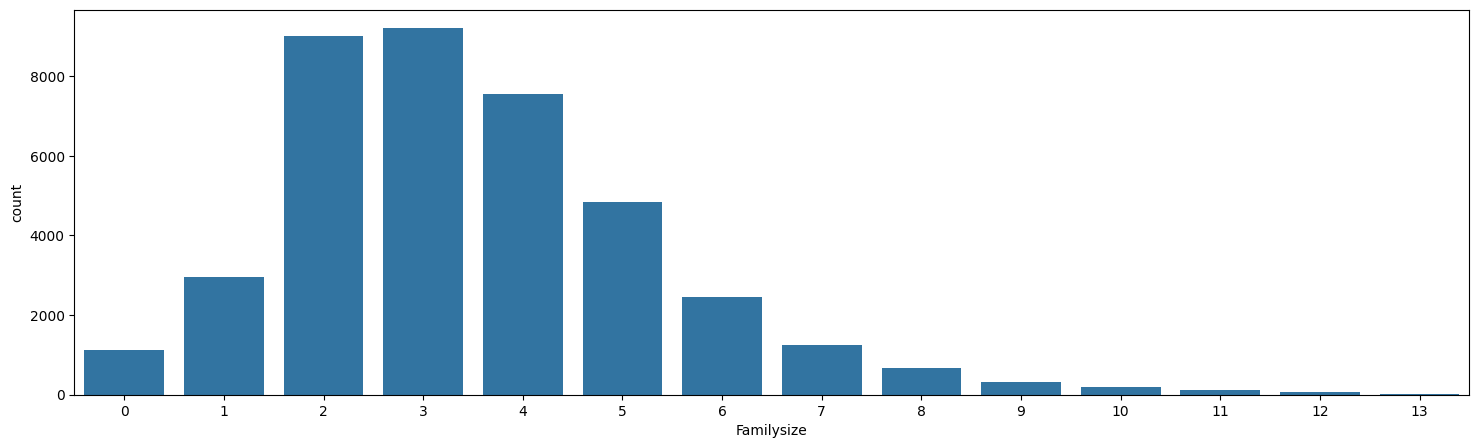

In [ ]:
indexes = depression[depression['Familysize'] > 13].index

print(f'Depression size before: {depression.shape[0]}')
depression = depression.drop(indexes, axis=0)
print(f'Depression size after: {depression.shape[0]}')

plt.figure(figsize=(18, 5))
sns.countplot(x=depression['Familysize'])


In [ ]:
age_indexes = depression[depression['Age'] > 65]['Age'].index

display(age_indexes) # figure out how many


print(f'Depression size before: {depression.shape[0]}')
depression.drop(age_indexes, axis=0, inplace=True)
print(f'Depression size after: {depression.shape[0]}')

Int64Index([  144,   152,   324,   494,   527,   914,  1048,  1061,  1334,
             1635,
            ...
            36164, 36439, 38163, 38221, 38346, 38458, 38846, 38877, 39291,
            39742],
           dtype='int64', length=119)

Depression size before: 39743
Depression size after: 39624


<Axes: xlabel='Age', ylabel='count'>

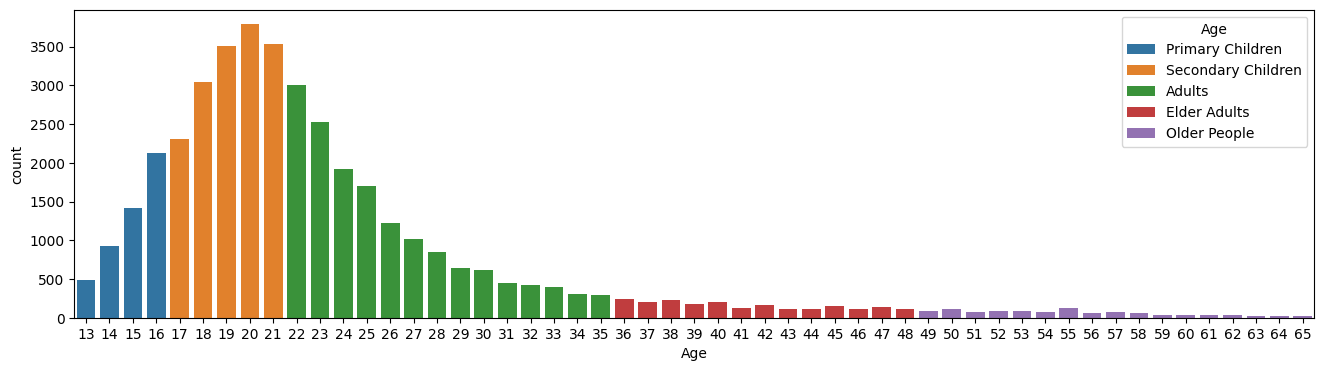

In [ ]:
def makeAgeGroup(value):
    if value <= 10:
        return 'Under 10'
    if  10 <= value <= 16:
        return 'Primary Children'
    if 17 <= value <= 21:
        return 'Secondary Children'
    if 21 <= value <= 35:
        return 'Adults'
    if 36 <= value <= 48:
        return 'Elder Adults'
    if value >= 49:
        return 'Older People'

age = depression['Age'].apply(makeAgeGroup)

plt.figure(figsize=(16, 4))
sns.countplot(x=depression['Age'], hue=age)


In [ ]:
def makeAgeGroupFeature(value):
    if value <= 10:
        return 1
    if  10 <= value <= 16:
        return 2
    if 17 <= value <= 21:
        return 3
    if 22 <= value <= 35:
        return 4
    if 36 <= value <= 48:
        return 5
    if value >= 49:
        return 6

depression['Age_group'] = depression['Age'].apply(makeAgeGroupFeature)

depression.drop('Age', axis=1, inplace=True)
depression.head()



,Q1,Q4,Q8,Q11,Q16,Q22,Q29,Q34,Q38,Q40,Q42,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Education,Gender,Race,Married,Familysize,Age_group
0,4,4,4,4,4,4,4,3,2,3,4,1,5,7,7,7,7,7,5,1,1,2,2,1.0,1,2,2
1,4,3,4,2,3,3,3,2,2,1,2,6,5,4,7,5,4,7,7,1,5,2,2,7.0,1,4,2
2,3,1,3,2,4,3,2,4,4,2,4,2,5,2,2,5,6,5,5,3,2,2,2,6.0,1,3,3
3,2,1,2,2,2,1,3,4,1,4,2,1,1,7,4,6,4,6,1,6,1,1,2,7.0,1,5,2
4,2,4,4,2,3,3,2,4,3,4,3,2,5,3,6,5,5,5,6,3,3,3,2,1.0,1,4,3


In [ ]:
depression['Total_count']  = depression.sum(axis=1)
depression.head()

,Q1,Q4,Q8,Q11,Q16,Q22,Q29,Q34,Q38,Q40,Q42,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Education,Gender,Race,Married,Familysize,Age_group,Total_count
0,4,4,4,4,4,4,4,3,2,3,4,1,5,7,7,7,7,7,5,1,1,2,2,1.0,1,2,2,98.0
1,4,3,4,2,3,3,3,2,2,1,2,6,5,4,7,5,4,7,7,1,5,2,2,7.0,1,4,2,98.0
2,3,1,3,2,4,3,2,4,4,2,4,2,5,2,2,5,6,5,5,3,2,2,2,6.0,1,3,3,86.0
3,2,1,2,2,2,1,3,4,1,4,2,1,1,7,4,6,4,6,1,6,1,1,2,7.0,1,5,2,79.0
4,2,4,4,2,3,3,2,4,3,4,3,2,5,3,6,5,5,5,6,3,3,3,2,1.0,1,4,3,91.0


In [ ]:
# depression[depression['Total_count']>89]['Total_count'].describe()

In [ ]:
def buildTarget(value):
    if value <= 75:
        return 'Normal'
    if 75 < value <= 80:
        return 'Mild'
    if 80 < value <= 88:
        return 'Moderate'
    if 88 < value <= 96:
        return 'Severe'
    if value > 96:
        return 'Extremely Severe'


depression['Target'] = depression['Total_count'].apply(buildTarget)

depression.head()


,Q1,Q4,Q8,Q11,Q16,Q22,Q29,Q34,Q38,Q40,Q42,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Education,Gender,Race,Married,Familysize,Age_group,Total_count,Target
0,4,4,4,4,4,4,4,3,2,3,4,1,5,7,7,7,7,7,5,1,1,2,2,1.0,1,2,2,98.0,Extremely Severe
1,4,3,4,2,3,3,3,2,2,1,2,6,5,4,7,5,4,7,7,1,5,2,2,7.0,1,4,2,98.0,Extremely Severe
2,3,1,3,2,4,3,2,4,4,2,4,2,5,2,2,5,6,5,5,3,2,2,2,6.0,1,3,3,86.0,Moderate
3,2,1,2,2,2,1,3,4,1,4,2,1,1,7,4,6,4,6,1,6,1,1,2,7.0,1,5,2,79.0,Mild
4,2,4,4,2,3,3,2,4,3,4,3,2,5,3,6,5,5,5,6,3,3,3,2,1.0,1,4,3,91.0,Severe


<Axes: xlabel='Target', ylabel='count'>

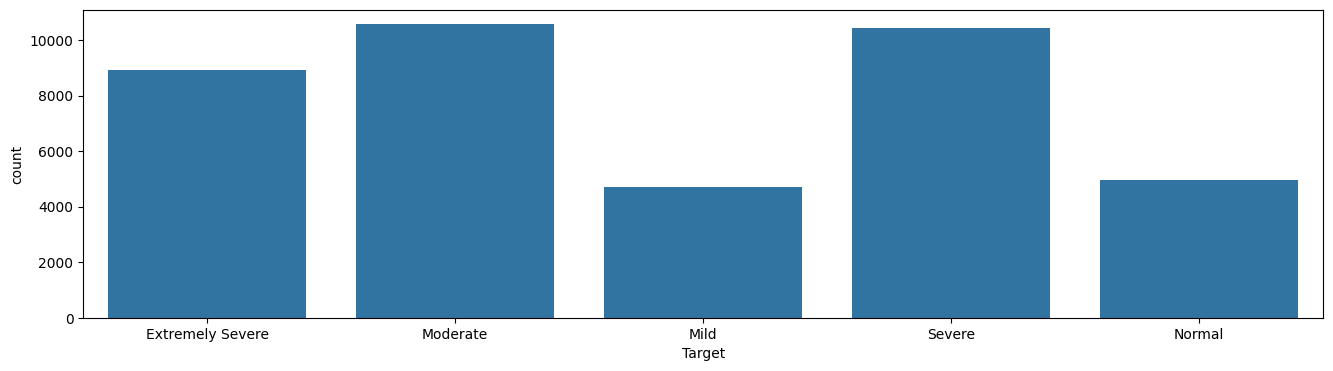

In [ ]:
plt.figure(figsize=(16, 4))
sns.countplot(x=depression['Target'])

In [ ]:
target = depression['Target']
processed_data=depression['Total_count']
depression.drop(['Target', 'Total_count'], axis=1, inplace=True)

In [ ]:
depression.head()

,Q1,Q4,Q8,Q11,Q16,Q22,Q29,Q34,Q38,Q40,Q42,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Education,Gender,Race,Married,Familysize,Age_group
0,4,4,4,4,4,4,4,3,2,3,4,1,5,7,7,7,7,7,5,1,1,2,2,1.0,1,2,2
1,4,3,4,2,3,3,3,2,2,1,2,6,5,4,7,5,4,7,7,1,5,2,2,7.0,1,4,2
2,3,1,3,2,4,3,2,4,4,2,4,2,5,2,2,5,6,5,5,3,2,2,2,6.0,1,3,3
3,2,1,2,2,2,1,3,4,1,4,2,1,1,7,4,6,4,6,1,6,1,1,2,7.0,1,5,2
4,2,4,4,2,3,3,2,4,3,4,3,2,5,3,6,5,5,5,6,3,3,3,2,1.0,1,4,3


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(depression, target, test_size=.2,random_state=77)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (31699, 27), y_train: (31699,)
x_test: (7925, 27), y_test: (7925,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC

svc_clf = SVC()

model=svc_clf.fit(x_train_scaled, y_train)

In [ ]:
# from sklearn.model_selection import cross_val_score

# cross_score = cross_val_score(svc_clf, x_train_scaled, y_train, cv=5)
# print(f'Mean Score {np.mean(cross_score)}')

In [ ]:
from sklearn.metrics import classification_report

y_pred_svc = svc_clf.predict(x_test_scaled)
  print(classification_report(y_test, y_pred_svc))

                  precision    recall  f1-score   support

Extremely Severe       0.99      0.98      0.98      1739
            Mild       0.95      0.94      0.94       922
        Moderate       0.96      0.98      0.97      2134
          Normal       0.99      0.96      0.98      1033
          Severe       0.97      0.97      0.97      2097

        accuracy                           0.97      7925
       macro avg       0.97      0.97      0.97      7925
    weighted avg       0.97      0.97      0.97      7925



In [ ]:
svc_clf.score(x_test_scaled, y_test)

0.9712302839116719

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
def pretty_confusion_matrix(y_test, y_pred, labels = ['Extreme', 'Severe','Moderate','Mild','Normal']):
    cm = confusion_matrix(y_test, y_pred)
    pred_labels = ['Predicted ' + i for i in labels]
    df = pd.DataFrame(cm, columns = pred_labels, index = labels)
    return df

results_plot = pretty_confusion_matrix(y_test, y_pred_svc,['Extreme', 'Severe','Moderate','Mild','Normal'])
results_plot

,Predicted Extreme,Predicted Severe,Predicted Moderate,Predicted Mild,Predicted Normal
Extreme,1702,0,0,0,37
Severe,0,868,41,13,0
Moderate,0,13,2092,0,29
Mild,0,37,0,996,0
Normal,22,0,36,0,2039


In [ ]:
depression.head()

,Q1,Q4,Q8,Q11,Q16,Q22,Q29,Q34,Q38,Q40,Q42,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,Education,Gender,Race,Married,Familysize,Age_group
0,4,4,4,4,4,4,4,3,2,3,4,1,5,7,7,7,7,7,5,1,1,2,2,1.0,1,2,2
1,4,3,4,2,3,3,3,2,2,1,2,6,5,4,7,5,4,7,7,1,5,2,2,7.0,1,4,2
2,3,1,3,2,4,3,2,4,4,2,4,2,5,2,2,5,6,5,5,3,2,2,2,6.0,1,3,3
3,2,1,2,2,2,1,3,4,1,4,2,1,1,7,4,6,4,6,1,6,1,1,2,7.0,1,5,2
4,2,4,4,2,3,3,2,4,3,4,3,2,5,3,6,5,5,5,6,3,3,3,2,1.0,1,4,3


In [ ]:
processed_data.head()

0    98.0
1    98.0
2    86.0
3    79.0
4    91.0
Name: Total_count, dtype: float64

In [ ]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))

In [ ]:
%pip install gradio
import gradio as gr

In [ ]:
def make_prediction(A,Q1	,Q4	,Q8	,Q11	,Q16	,Q22	,Q29,	Q34	,Q38	,Q40	,Q42,B,TIPI1	,TIPI2	,TIPI3	,TIPI4	,TIPI5	,TIPI6	,TIPI7,	TIPI8	,TIPI9	,TIPI10	,C,education,D,gender	,E,race	,F,married,familysize	,H,age_group):
    model_working=pickle.load(open('model.pkl','rb'))
    answer=np.array([Q1	,Q4	,Q8	,Q11	,Q16	,Q22	,Q29,	Q34	,Q38	,Q40	,Q42,TIPI1	,TIPI2	,TIPI3	,TIPI4	,TIPI5	,TIPI6	,TIPI7,	TIPI8	,TIPI9	,TIPI10	,education	,gender	,race	,married	,familysize	,age_group])
    answers_scaled=scaler.transform([answer])
    predict=model_working.predict(answers_scaled)
    return predict

In [ ]:
app=gr.Interface(make_prediction,
                 inputs=[
                     gr.Markdown('''Question 1-11 have to be answer as per the no. range outlined below:\n
                                        1 = Did not apply to me at all\n
                                        2 = Applied to me to some degree, or some of the time\n
                                        3 = Applied to me to a considerable degree, or a good part of the time\n
                                        4 = Applied to me very much, or most of the time\n
                                        '''),
                     gr.Slider(minimum=1,maximum=4,step=1,label="1 : I found myself getting upset by quite trivial things."),
                     gr.Slider(minimum=1,maximum=4,step=1,label="2 : I experienced breathing difficulty."),
                     gr.Slider(minimum=1,maximum=4,step=1,label="3 : I found it difficult to relax."),
                     gr.Slider(minimum=1,maximum=4,step=1,label="4 : I found myself getting upset rather easily."),
                     gr.Slider(minimum=1,maximum=4,step=1,label="5 : I felt that I had lost interest in just about everything."),
                     gr.Slider(minimum=1,maximum=4,step=1,label="6 : I found it hard to wind down."),
                     gr.Slider(minimum=1,maximum=4,step=1,label="7 : I found it hard to calm down after something upset me."),
                     gr.Slider(minimum=1,maximum=4,step=1,label="8 : I felt I was pretty worthless."),
                     gr.Slider(minimum=1,maximum=4,step=1,label="9 : I felt that life was meaningless."),
                     gr.Slider(minimum=1,maximum=4,step=1,label="10 : I was worried about situations in which I might panic and make a fool of myself."),
                     gr.Slider(minimum=1,maximum=4,step=1,label="11 : I found it difficult to work up the initiative to do things."),
                     gr.Markdown('''Question 1-10 have to be answer as per the no. range outlined below: \n
                                        1 = Disagree strongly\n
                                        2 = Disagree moderately\n
                                        3 = Disagree a little\n
                                        4 = Neither agree nor disagree\n
                                        5 = Agree a little\n
                                        6 = Agree moderately\n
                                        7 = Agree strongly\n'''),
                     gr.Slider(minimum=1,maximum=7,step=1,label="1 : Extraverted, enthusiastic."),
                     gr.Slider(minimum=1,maximum=7,step=1,label="2 : Critical, quarrelsome."),
                     gr.Slider(minimum=1,maximum=7,step=1,label="3 : Dependable, self-disciplined"),
                     gr.Slider(minimum=1,maximum=7,step=1,label="4 : Anxious, easily upset."),
                     gr.Slider(minimum=1,maximum=7,step=1,label="5 : Open to new experiences, complex."),
                     gr.Slider(minimum=1,maximum=7,step=1,label="6 : Reserved, quiet."),
                     gr.Slider(minimum=1,maximum=7,step=1,label="7 : Sympathetic, warm."),
                     gr.Slider(minimum=1,maximum=7,step=1,label="8 : Disorganized, careless."),
                     gr.Slider(minimum=1,maximum=7,step=1,label="9 : Calm, emotionally stable."),
                     gr.Slider(minimum=1,maximum=7,step=1,label="10 : Conventional, uncreative."),
                     gr.Markdown('''Education:\n
                                        1=Less than high school,\n
                                        2=High school,\n
                                        3=University degree,\n
                                        4=Graduate degree\n'''),
                     gr.Slider(minimum=1,maximum=4,step=1,label="Education"),
                     gr.Markdown('''Gender:\n
                                        1=Male,\n
                                        2=Female,\n
                                        3=Other\n'''),
                     gr.Slider(minimum=1,maximum=3,step=1,label="Gender"),
                     gr.Markdown('''Race:\n
                                        1=Asian,\n
                                        2=Arab,\n
                                        3=Black,\n
                                        4=Indigenous Australian,\n
                                        5=Native American,\n
                                        6=White,\n
                                        7=Other\n'''),
                     gr.Slider(minimum=1,maximum=7,step=1,label="Race"),
                     gr.Markdown('''Married:\n
                                        1=Never married,\n
                                        2=Currently married,\n
                                        3=Previously married\n'''),
                     gr.Slider(minimum=1,maximum=3,step=1,label="Married"),
                     gr.Slider(minimum=1,maximum=13,step=1,label="FamilySize"),
                     gr.Markdown('''Age_group:\n
                                        1= less then 10,\n
                                        2 = 11 to 16,\n
                                        3 = 17 to 21,\n
                                        4 = 22 to 35,\n
                                        5 = 36 to 48,\n
                                        6 = above 48,\n'''),
                     gr.Slider(minimum=1,maximum=6,step=1,label="Age_group"),],
                     outputs=[gr.Textbox(label="Level of Depression")],)

app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://69805378a63740d68b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
